#Connect Google Colab With your Google drive For Data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries for viewing Data


In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#Show Some Data

In [ ]:
normal_xry = cv2.imread('/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0117-0001.jpeg')

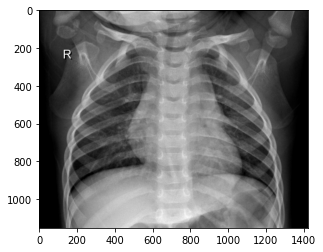

In [ ]:
plt.imshow(normal_xry)

In [ ]:
normal_xry.shape

(1152, 1422, 3)

In [ ]:
normal_xry =  cv2.cvtColor(normal_xry, cv2.COLOR_BGR2RGB)

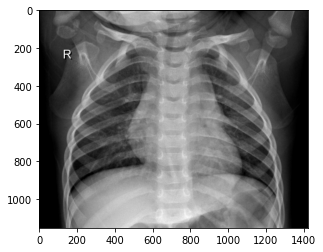

In [ ]:
plt.imshow(normal_xry)

#Making image Genrator 

In [ ]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator

In [ ]:
img_gen = ImageDataGenerator(rotation_range=30, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale = 1/255,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip= True,
                             fill_mode='nearest'                             
                             )

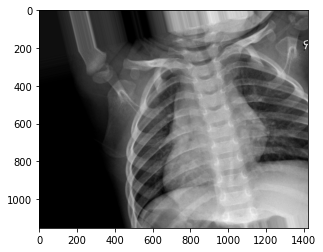

In [ ]:
plt.imshow(img_gen.random_transform(normal_xry))

In [ ]:
img_gen.flow_from_directory('/content/drive/MyDrive/chest_xray/train')

Found 5132 images belonging to 2 classes.


In [ ]:
img_gen.flow_from_directory('/content/drive/MyDrive/chest_xray/test')

Found 624 images belonging to 2 classes.


In [ ]:
inpt_shape = (150, 150,3)

#Import LAyers, Kernal and Model 

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#*Makeing CNN*

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=(1,1),input_shape=inpt_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3), input_shape=inpt_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=inpt_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile Model 

In [ ]:
optimiz = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer=optimiz, metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [ ]:
inpt_shape[:2]

(150, 150)

#Make testing and traning genrater 

In [ ]:
batch_size= 32

train_gen = img_gen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                        target_size=inpt_shape[:2],
                                        batch_size= batch_size,
                                        class_mode= 'binary')

Found 5132 images belonging to 2 classes.


In [ ]:
test_gen = img_gen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                        target_size=inpt_shape[:2],
                                        batch_size= batch_size,
                                        class_mode= 'binary')

Found 624 images belonging to 2 classes.


#Show  Model Clases 

In [ ]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

#Train Model

In [ ]:
result = model.fit(train_gen, epochs=30,validation_data=test_gen)


Epoch 1/30
161/161 [==============================] - 78s 480ms/step - loss: 0.5497 - accuracy: 0.7551 - val_loss: 0.7307 - val_accuracy: 0.6250
Epoch 2/30
161/161 [==============================] - 77s 477ms/step - loss: 0.4371 - accuracy: 0.7592 - val_loss: 0.6036 - val_accuracy: 0.6330
Epoch 3/30
161/161 [==============================] - 77s 482ms/step - loss: 0.4127 - accuracy: 0.7917 - val_loss: 0.6963 - val_accuracy: 0.6667
Epoch 4/30
161/161 [==============================] - 76s 475ms/step - loss: 0.3853 - accuracy: 0.8188 - val_loss: 0.7349 - val_accuracy: 0.7035
Epoch 5/30
161/161 [==============================] - 76s 472ms/step - loss: 0.3412 - accuracy: 0.8492 - val_loss: 0.5729 - val_accuracy: 0.7532
Epoch 6/30
161/161 [==============================] - 76s 475ms/step - loss: 0.3120 - accuracy: 0.8661 - val_loss: 0.4868 - val_accuracy: 0.8205
Epoch 7/30
161/161 [==============================] - 76s 475ms/step - loss: 0.2830 - accuracy: 0.8796 - val_loss: 0.6118 - val_ac

In [ ]:
print(result.history['accuracy'])

[0.7550662755966187, 0.759158194065094, 0.7916991710662842, 0.8187841176986694, 0.849181592464447, 0.8661340475082397, 0.8795791268348694, 0.885424792766571, 0.8906859159469604, 0.902961790561676, 0.9012081027030945, 0.9177708625793457, 0.9140685796737671, 0.9138737320899963, 0.9255650639533997, 0.9243959188461304, 0.9261496663093567, 0.9259548187255859, 0.9314107298851013, 0.9298518896102905, 0.9355027079582214, 0.9343336224555969, 0.9298518896102905, 0.93784099817276, 0.9390101432800293, 0.9300467371940613, 0.9401792883872986, 0.93784099817276, 0.9358924627304077, 0.9427123665809631]


In [ ]:
print(result.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Draw Graph B/W  traning accuracy and testing accuracy

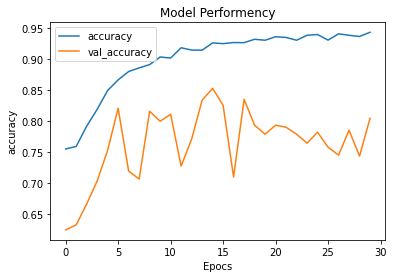

In [ ]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Performency')
plt.ylabel('accuracy')
plt.xlabel('Epocs')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

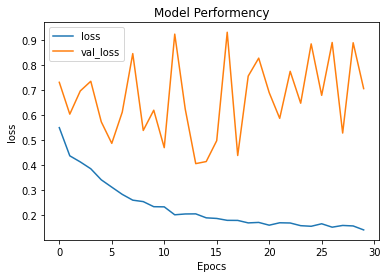

In [ ]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Performency')
plt.ylabel('loss')
plt.xlabel('Epocs')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

#Prediction on some Data 

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
normal_xry = image.load_img('/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg', target_size= (150, 150))
normal_xry = image.img_to_array(normal_xry)
normal_xry = np.expand_dims(normal_xry, axis=0)
normal_xry = normal_xry/255
print(normal_xry.shape)

(1, 150, 150, 3)


In [ ]:
prediction = model.predict(normal_xry)

In [ ]:
print(f'probabiliti of normal xray report is:{prediction}')

probabiliti of normal xray report is:[[0.01914333]]


In [ ]:
classes = model.predict_classes(normal_xry)
print(classes)

[[0]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


#Saveing Model

In [ ]:
model.save_weights('Chest_Xray_Pneumonia.h5')


model_json = model.to_json()
with open('Chest_Xray_Pneumonia_json.json', 'w') as json_file:
  json_file.write(model_json)